# Diabetes Classification using a Binary Logistic Regression Model 

## Data Preparation

### Load libraries

In [1]:
import pandas as pd               #data loading and manipulation
import matplotlib.pyplot as plt   #plotting
import seaborn as sns             #statistical plotting

### Read diabetes data

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,neg
1,0,137,40,35,168,43.1,2.288,33,pos
2,3,78,50,32,88,31.0,0.248,26,pos
3,2,197,70,45,543,30.5,0.158,53,pos
4,1,189,60,23,846,30.1,0.398,59,pos


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
pregnant    392 non-null int64
glucose     392 non-null int64
pressure    392 non-null int64
triceps     392 non-null int64
insulin     392 non-null int64
mass        392 non-null float64
pedigree    392 non-null float64
age         392 non-null int64
diabetes    392 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


### Mapping neg:0 and pos :1

In [5]:
diabetes["diabetes"] = diabetes["diabetes"].map({"neg":0, "pos":1})

In [6]:
diabetes.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


### Data info

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
pregnant    392 non-null int64
glucose     392 non-null int64
pressure    392 non-null int64
triceps     392 non-null int64
insulin     392 non-null int64
mass        392 non-null float64
pedigree    392 non-null float64
age         392 non-null int64
diabetes    392 non-null int64
dtypes: float64(2), int64(7)
memory usage: 27.7 KB


In [8]:
diabetes.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Plotting

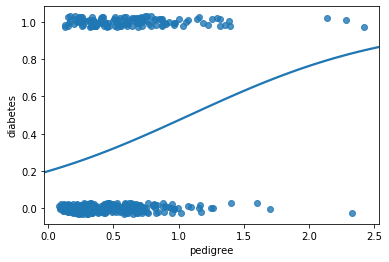

In [9]:
# Plot pedigree and diabetes and add the logistic fit
sns.regplot(x = "pedigree", y = "diabetes", 
            y_jitter = 0.03,
            data = diabetes, 
            logistic = True,
            ci = None)

# Display the plot
plt.show()

## Model fitting

### Train, Test Split

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(diabetes,
                                         test_size = 0.20,
                                         random_state = 42)

#### Fitting logistic regression

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import logit 


formula = ('diabetes ~ pregnant + glucose + pressure + triceps + insulin + mass + pedigree + age')

model = logit(formula = formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.426450
         Iterations 7


#### Model summary table

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               diabetes   No. Observations:                  313
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            8
Date:                Sat, 07 Mar 2020   Pseudo R-squ.:                  0.3269
Time:                        13:55:50   Log-Likelihood:                -133.48
converged:                       True   LL-Null:                       -198.29
Covariance Type:            nonrobust   LLR p-value:                 3.382e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.3495      1.390     -7.444      0.000     -13.075      -7.624
pregnant       0.1181      0.063      1.888      0.059      -0.005       0.241
glucose        0.0380      0.006      5.937      0.000       0.025       0.051
pressure       0.0099      0.014      0.701      0.483      -0.018       0.037
triceps        0.0211      0.019      1.100      0.271      -0.017       0.059
insulin        0.0010      0.001      0.666      0.505      -0.002       0.004
mass           0.0472      0.032      1.476      0.140      -0.015       0.110
pedigree       1.2316      0.484      2.543      0.011       0.282       2.181
age            0.0188      0.020      0.950      0.342      -0.020       0.058
==============================================================================
"""

#### ODDs Ratio

In [13]:
print(np.exp(model.params))

Intercept    0.000032
pregnant     1.125365
glucose      1.038708
pressure     1.009922
triceps      1.021353
insulin      1.000981
mass         1.048328
pedigree     3.426683
age          1.019004
dtype: float64


### Average Merginal Effects



* Options are:

  *  ```‘overall’```, The average of the marginal effects at each observation.

  * ```‘mean’```, The marginal effects at the mean of each regressor.

  * ```‘median’```, The marginal effects at the median of each regressor.

  * ```‘zero’```, The marginal effects at zero for each regressor.

  * ```‘all’```, The marginal effects at each observation. If at is all only margeff will be available from the returned object.




**method str, optional**

* Options are:


 * ```‘dydx’``` - dy/dx - No transformation is made and marginal effects are returned. This is the default.
 
 

 * ```‘eyex’``` - estimate elasticities of variables in exog – $$\frac {d(lny)}{d(lnx)}$$


 * ```‘dyex’``` - estimate semi-elasticity – $$\frac {dy}{d(lnx)}$$


 * ```‘eydx’``` - estimate semi-elasticity – $$\frac {d(lny)}{dx}$$


In [14]:
AME = model.get_margeff(at='overall', method='dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:               diabetes
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pregnant       0.0161      0.008      1.921      0.055      -0.000       0.032
glucose        0.0052      0.001      7.577      0.000       0.004       0.007
pressure       0.0013      0.002      0.703      0.482      -0.002       0.005
triceps        0.0029      0.003      1.105      0.269      -0.002       0.008
insulin        0.0001      0.000      0.668      0.504      -0.000       0.001
mass           0.0064      0.004      1.494      0.135      -0.002       0.015
pedigree       0.1677      0.064      2.626      0.009       0.043       0.293
age            0.0026      0.003      0.956      0.339      -0.003       0.008


## Model evaluation on test data set

In [15]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score



# Compute prediction
prediction = model.predict(exog = test_data)



# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)

# Assign actual class labels from the test sample to y_actual
y_actual = test_data["diabetes"]


# Compute and print confusion matrix using crosstab function
conf_matrix = pd.crosstab(y_actual, y_prediction,
                       rownames = ["Actual"], 
                       colnames = ["Predicted"], 
                       margins = True)
                      
# Print the confusion matrix
print(conf_matrix)

Predicted   0   1  All
Actual                
0          44   8   52
1          11  16   27
All        55  24   79


### Classification accuracy

In [16]:
accuracy = accuracy_score(y_actual, y_prediction)

print('Accuracy: %.2f' % accuracy + "%")

Accuracy: 0.76%


### Classification report

In [17]:
print(classification_report(y_actual, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.67      0.59      0.63        27

    accuracy                           0.76        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.75      0.76      0.76        79



### F1 Score 

In [18]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_actual, y_prediction)))

F1 Score: 0.627450980392157


### ROC_AUC estimation

In [31]:
roc_auc = roc_auc_score(y_actual, y_prediction)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.72%


### Reciever Operating Curve

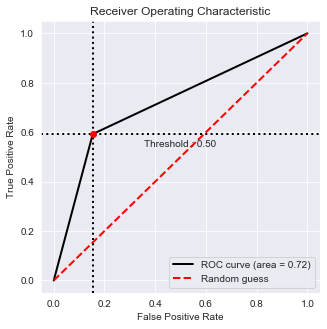

In [22]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_actual,
                          y_prediction,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()